## Analog-to-digital converter
In CASPER toolflow, all of the original analog astronomical signals are converted to digital signals for further analysis. An ADC is a system that converts input analog voltage to a digital number proportional to the magnitude of the voltage.
There are lots of [ADCs](https://casper.berkeley.edu/wiki/Hardware) you can find for your application in CASPER. However, you need to know which ADC is the best choice for your instrument. In here, we will first introduce some important parameters of ADCs we usually care about in Astronomy. And then we will investigate the implications of the sampling theorem through several python examples. Last, some other sampling tricks such as bandpass sampling, time interleaved sampling will be mentioned.
### Key parameters of ADC
* Sampling rate

The bandwidth of an ADC is characterized primarily by its sampling rate. Here is the usual statement of the Shannon-Nyquist sampling theorem from wikipedia:

"If a function x(t) contains no frequencies higher than B hertz, it is completely determined by giving its ordinates at a series of points spaced 1/(2B) seconds apart."

A sufficient sample-rate is therefore 2B samples/second, or anything larger. Equivalently, for a given sample rate fs, perfect reconstruction is guaranteed possible for a bandlimit B < fs/2.
For example, the [ADC2X1000-8](https://casper.berkeley.edu/wiki/ADC2x1000-8) has maximum sampling rate of 1000MHz when it used as daul channel mode, so the bandwidth is:

$BW = \frac{Sampling\underline{}Rate}{2} = \frac{1000}{2} = 500MHz$

* Resolution

The resolution of the converter indicates the number of discrete values it can produce over the range of analog values. The values are usually stored electronically in binary form, so the resolution is usually expressed in bits. Consequently, the number of discrete values available, or "levels", is assumed to be a power of two. For example, an ADC with a resolution of 8 bits can encode an analog input to one in 256 different levels, since $2^{8} = 256$. The values can represent the ranges from 0 to 255 (i.e. unsigned integer) or from −128 to 127 (i.e. signed integer), depending on the application.

Resolution can also be defined electrically, and expressed in volts. The minimum change in voltage required to guarantee a change in the output code level is called the least significant bit (LSB) voltage. The resolution Q of the ADC is equal to the LSB voltage. The voltage resolution of an ADC is equal to its overall voltage measurement range divided by the number of intervals. For example: if full scale measurement range from -5 to 5 volts, and the ADC resolution is 8 bits, the ADC voltage resolution is Q = (5 V − (-5) V) / 256 = 10 V / 256 ≈ 0.039 V ≈ 39 mV.

In practice, the useful resolution of a converter is limited by the best signal-to-noise ratio (SNR) that can be achieved for a digitized signal. An ADC can resolve a signal to only a certain number of bits of resolution, called the effective number of bits (ENOB). 

* Signal-to-noise ratio

The signal-to-noise ratio (SNR) is the ratio of the root mean square (RMS) power of the input signal to the RMS noise power (excluding harmonic distortion), expressed in decibels (dB), as shown in following Equation:

$SNR(dB) = 20log(\frac{V_{signal}(rms)}{V_{noise}(rms)})$

* Effective number of bits (ENOB) 

ENOB is a measure of the dynamic range of an ADC. The resolution of an ADC is specified by the number of bits used to represent the analog value, in principle giving 2$^N$ signal levels for an N-bit signal. An ideal ADC has an ENOB equal to its resolution. An often used definition is:

$ENOB = \frac{SINAD-1.76}{6.02}$,

where all values are given in dB and
SINAD is the ratio indicating the quality of the signal,
the 6.02 term in the divisor converts decibels (a log$_{10}$ representation) to bits (a log$_2$ representation),
and the 1.76 term comes from quantization error in an ideal ADC.

For example, [ADC1x5000-8](https://casper.berkeley.edu/wiki/File:Ev8aq160.pdf) has ENOB of 7.5 bits at 100MHz, so the SINAD = ENOB * 6.02 + 1.76 = 46.91 dB. 

* Spurious-free dynamic range

Spurious-free dynamic range (SFDR) is the difference between the magnitude of the measured signal and its highest spur peak. The SFDR of an ADC is influenced by many factors, including the resolution, linearity and accuracy (how well the quantization levels match the true analog signal), aliasing and jitter. SFDR is usually measured in dBFS with respect to the ADC's full-scale range. SFDR is observed within a pre-defined frequency window or from DC up to Nyquist frequency of the ADC. The value of SFDR is usually larger than SINAD in an ADC. 

For a better understanding of SINAD, ENOB, SNR, THD, THD + N, and SFDR you can read [this paper](MT-003.pdf).

The radio frequency environment is getting worse and worse especially at lower frequency band(<12GHz). To avoid saturation while conducting research in radio astronomy, it is recommended to use ADCs that have a wider dynamic range such as 16 bits.

### Sampling example
To help you understand how sampling therom work on real signal, we can generate a sin wave like this: $f(t) = A.sin(2.pi.f.t + phi)$ , and this sin wave will be sampled under sampling rate of fs.
Where A is amplitude, f is frequency and phi is phase angle.

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#fig,ax = plt.subplots()

Text(0,0.5,'amplitude')

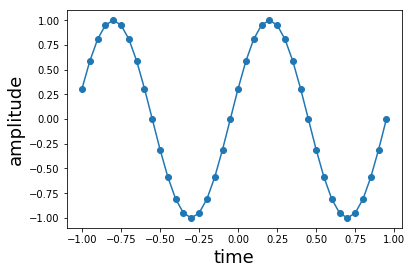

In [258]:
f = 1.0  # Hz, signal frequency
fs = 20.0 # Hz, sampling rate (ie. >= 2*f) 
A = 1 # amplitude
phi = 0.1 * np.pi # phase 
t = np.arange(-1,1,1/fs) # sample interval, symmetric for convenience later
sin_wave = A * np.sin(2*np.pi*f*t+phi) # generate a sin wave f(t)=A.sin(2.pi.f.t+phi)

plt.plot(t,sin_wave,'o-')
plt.xlabel('time',fontsize=18)
plt.ylabel('amplitude',fontsize=18)

We set f = 1 Hz, and fs = 20 Hz, so each period of sin wave has 20 sample bins because sampling rate is 20 times of frequency of sin wave, you can count on this figure. The Shannon-Nyquist sampling theorem tells us that a sufficient sample-rate is times 2 of frequency of signal or larger, but when we decrease this number it will distort the wave. For example, when we decrease fs to 10 Hz , 5 Hz and 2 Hz, you can see the waves getting worse.

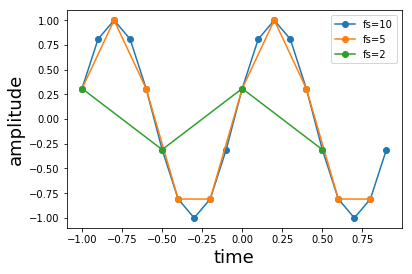

In [259]:
f = 1.0  # Hz, signal frequency
fs1 = 10.0 # Hz, sampling rate 
fs2 = 5.0 # Hz, sampling rate 
fs3 = 2.0 # Hz, sampling rate 
A = 1 # amplitude
phi = 0.1 * np.pi # phase 
t1 = np.arange(-1,1,1/fs1) # sample interval
sin_wave1 = A * np.sin(2*np.pi*f*t1+phi)
t2 = np.arange(-1,1,1/fs2) # sample interval
sin_wave2 = A * np.sin(2*np.pi*f*t2+phi)
t3 = np.arange(-1,1,1/fs3) # sample interval
sin_wave3 = A * np.sin(2*np.pi*f*t3+phi)

plt.plot(t1,sin_wave1,'o-',label='fs=10')
plt.plot(t2,sin_wave2,'o-',label='fs=5')
plt.plot(t3,sin_wave3,'o-',label='fs=2')
plt.xlabel('time',fontsize=16)
plt.ylabel('amplitude',fontsize=16)
plt.legend()

### Bandpass Sampling(Undersampling)
Bandpass sampling or Undersampling is a technique where one samples a bandpass-filtered signal at a sample rate below its Nyquist rate (twice the upper cutoff frequency), but is still able to reconstruct the signal. Suppose there is an IF signal from 2.5-5GHz, you have an ADC1x5000-8 card, the max. bandwidth is 2.5GHz which is much narrower than the signal, if you want sample this signal you have to downconvert it to baseband, this is tradional way based on Shannon-Nyquist Sampling Theorem. However, bandpass sampling theorem tells us we can sample the signal directly if we connect a bandpass filter to avoid any spectral overlap. If you put a 2.5-5GHz filter before you sampling, a perfect reconstruction of the continuous time signal from its samples is possible. Just caution that the spectral will be flipped because we are sampled at second Nyquist zone, so the collected data will from 5GHz to 2.5GHz(see Following example).

Text(0.5,0,'frequency')

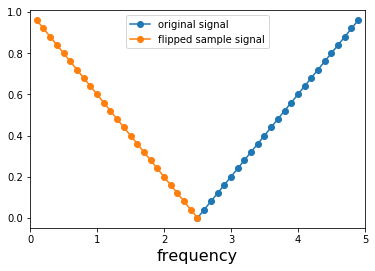

In [262]:
signal = np.arange(0,1,1/25) # generate a signal
freq = np.arange(2.5,5,0.1) # the frequency of signal
freq_flip = np.arange(2.5,0,-0.1) # the flipped frequency of signal

plt.plot(freq,signal,'o-',label='original signal') #plot the signal
plt.plot(freq_flip,signal,'o-',label='flipped sample signal') # plot the filpped signal
plt.xlim(0,5)
plt.legend()
plt.xlabel('frequency',fontsize=16)

### Time Interleaved Sampling 
Time Interleaved Sampling (TIS) is a technique to increase the real-time sample rate of a digitizer. TIS uses multiple analog-to-digital converters (ADCs) to sample the same input waveform, but at different relative phases. The hardware then interleaves these samples to create the waveform as if only one ADC were sampling the waveform at a higher sample rate. National Instruments has a very good introduction on how TIS works, you can find it in [here](http://zone.ni.com/reference/en-XX/help/370592N-01/digitizers/timeinterleavedsampling/).

You can find some TIS ADCs on casper website, for example, [ADC1x5000-8](https://casper.berkeley.edu/wiki/ADC1x5000-8) can be configured as single 5.0GSps or dual 2.5GSps sampling mode. Actually, the ADC chip used in this ADC card is [EV8AQ160](https://casper.berkeley.edu/wiki/images/1/19/Ev8aq160.pdf) which has four cores inside, each core can be sampled at maximum rate of 1.25GSps, you can use them independently or group them by two cores. Here is an example to help you understand how this ADC works.To obtain a 2.5 GSps sampling rate we can confiure it to two-channel mode with the ADCs interleaved two by two, each operated at 1.25 GSps, the 1.25 GHz clock of one ADC is shifted 180 degrees with respect to the 1.25 GHz clock of the other ADC.

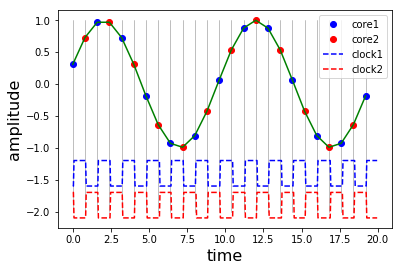

In [263]:
from scipy import signal

f = 0.1  # GHz, signal frequency
fs = 1.25 # GHz, sampling rate 

A = 1 # amplitude
phi = 0.1 * np.pi# phase 

t = np.arange(0,20,1/fs) # sample interval, symmetric for convenience later
t1 = t[0::2] # segment to two array for two ADC cores
t2 = t[1::2]

rain = np.arange(-2,1.1,0.1) # for clock alignment
x_rain = len(rain)*t.tolist()
x_rain = np.array(x_rain).reshape(len(rain),len(t))
for i in range(len(t)):
    plt.plot(x_rain.T[i],rain,color='gray',linewidth='0.5')

sin_wave = A * np.sin(2*np.pi*f*t+phi) # original sin wave
sin_wave1 = A * np.sin(2*np.pi*f*t1+phi) # sampled sin wave by first ADC core
sin_wave2 = A * np.sin(2*np.pi*f*t2+phi) # sampled sin wave by second ADC core

t_s = np.linspace(0, 20, 500, endpoint=False)

clock1 = -1.4+0.2*signal.square(2 * np.pi * 1.25/2 * t_s-phi) # clock sinal 1
clock2 = -1.9+0.2*signal.square(2 * np.pi * 1.25/2 * t_s-phi+np.pi) # clock signal 2

plt.plot(t1,sin_wave1,'b''o',label='core1') # plot adc core 1
plt.plot(t2,sin_wave2,'r''o',label='core2') # plot adc core 2
plt.plot(t,sin_wave,'g') # plot original sin wave

plt.plot(t_s,clock1,'--',color='b',label='clock1') 
plt.plot(t_s,clock2,'--',color='r',label='clock2')

plt.xlabel('time',fontsize=16)
plt.ylabel('amplitude',fontsize=16)
plt.legend()

The blue and red circles are shown in above figure represent sampling bins from core1 and core2 seperately. For better see how different cores sampling, we put the clocks signal in this same figure, please ignore the x axis for clock signal. The blue and red dashed lines are the clocks for two cores, suppose the red one is shifted 180 degrees with respect to the blue one. Sampling just happened at the rising edge of each clock, so the core1 get n points of data and core2 get another n points of data. The data returned is in order and is acquired in real time. So the input waveform can be reconstructed by this two cores.

There are lots of things will affect our output waveform because multi-cores are used in TIS. It is possible for mismatch between ADCs and phase offset between clocks to cause small changes in the spectral performance of the digitizer. Most of these changes have been calibrated when the chips went out, but some small residual changes may persist, so you may need to do some calibration before you use them, particularly in frequency domain applications. Following are some effections we usually concerned in TIS:

+ MMCM - Is the "mixed mode clock manager". This is used for correcting the phase of the capture clock between the four cores. Depending on where the rising edge of the capture clock lies, glitches in the ADC samples can occur. The ADC has the ability to provide test ramps that they use to detect glitches and adjust the MMCM appropriately to eliminate them. One must eliminate the glitches before applying the OGP & INL corrections (see below).

+ OGP: Offset, Gain, Phase

    (1) Offset mismatch—If the ADCs are not perfectly matched in DC offset, a small spur can appear at DC and at the Nyquist frequency (Sample Rate/2). 

    (2) Gain Mismatch—If the ADCs are not perfectly matched in DC gain, spurs occur at image frequencies of input signal frequencies. The size of the image spurs are proportional to the amount of gain mismatch. 

    (3) Phase Offset—If the ADCs are not sampling at exactly the correct phase for the interleaving factor, images of the frequency content similar to those found with gain mismatch will occur.
+ INL - Integral Non Linearity. This term describes the non-linearity of ADCs.

[Here](https://github.com/nrao/adc5g_devel) is an ADC5G calibration memo wrote by engineers from NARO which implemented MMCM,OGP and INL calibration.